## Import packages

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
import torch
from botorch.utils.multi_objective import is_non_dominated
from botorch.utils.multi_objective.hypervolume import Hypervolume
import matplotlib
from scipy.stats import pearsonr


## Example pareto plot

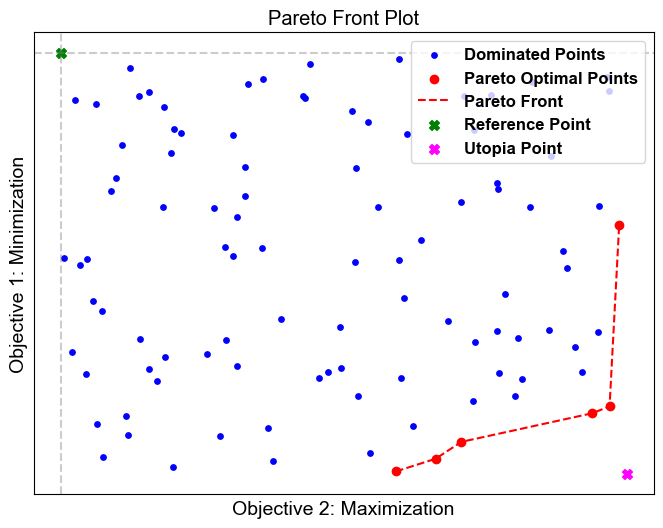

In [180]:
# Generate random data for the demonstration
np.random.seed(42)
x = np.random.uniform(4, 25, 100)  # Maximization problem
y = np.random.uniform(4, 25, 100)  # Minimization problem

# Identify Pareto optimal points
is_pareto = np.ones(x.shape, dtype=bool)  # Initially mark all points as Pareto optimal

for i, (x_i, y_i) in enumerate(zip(x, y)):
    # Check if there is any point better in both objectives
    is_pareto[i] = not np.any((x >= x_i) & (y <= y_i) & ((x > x_i) | (y < y_i)))

# Extract Pareto front points
pareto_x = x[is_pareto]
pareto_y = y[is_pareto]

# Sort Pareto front for visualization
sorted_indices = np.argsort(pareto_x)
pareto_x = pareto_x[sorted_indices]
pareto_y = pareto_y[sorted_indices]

# Define the reference point
reference_point = [4, 25]  # Example reference point outside the data range
utopia_point = [25, 4]  # Utopia point (best values for both objectives)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot dominated points
plt.scatter(x[~is_pareto], y[~is_pareto], color='blue', s=15, label='Dominated Points')

# Plot Pareto optimal points
plt.scatter(pareto_x, pareto_y, color='red', label='Pareto Optimal Points')

# Plot Pareto front line
plt.plot(pareto_x, pareto_y, linestyle='--', color='red', label='Pareto Front')

# Plot the reference point
plt.scatter(reference_point[0], reference_point[1], color='green', marker='X', s=50, label='Reference Point')

# Plot the utoptia point
plt.scatter(utopia_point[0], utopia_point[1], color='magenta', marker='X', s=50, label='Utopia Point')


# Set axis limits
plt.xlim(3, 26)
plt.ylim(3, 26)

# Remove x and y-axis ticks
plt.xticks([])
plt.yticks([])

# Labels and legend
plt.title("Pareto Front Plot")
plt.xlabel("Objective 2: Maximization", fontsize=14)
plt.ylabel("Objective 1: Minimization", fontsize=14)
plt.axhline(reference_point[1], linestyle='--', color='gray', alpha=0.4)  # Horizontal line from reference
plt.axvline(reference_point[0], linestyle='--', color='gray', alpha=0.4)  # Vertical line from reference
# plt.axhline(utopia_point[1], linestyle='--', color='gray', alpha=0.4)  # Horizontal line from reference
# plt.axvline(utopia_point[0], linestyle='--', color='gray', alpha=0.4)  # Vertical line from reference
plt.legend(loc="upper right")  # Place the legend in the upper right corner
plt.grid(True)

# Show the plot
plt.savefig('../figures/pareto_plot.png')
plt.show()

## Example hypervolume plot

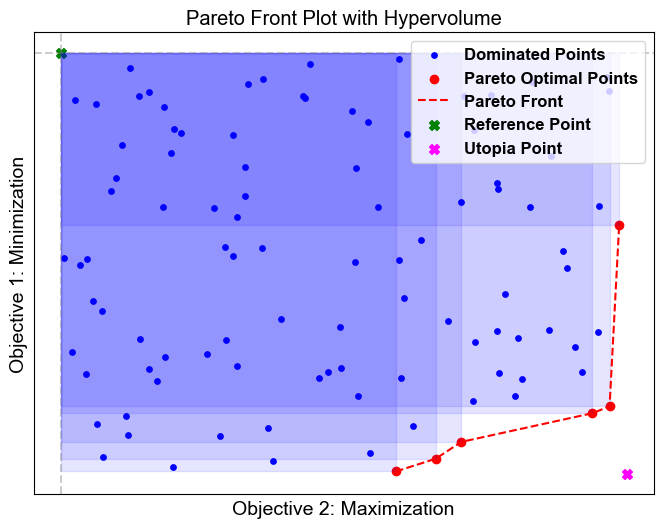

In [179]:
# Generate random data for the demonstration
np.random.seed(42)
x = np.random.uniform(4, 25, 100)  # Maximization problem
y = np.random.uniform(4, 25, 100)  # Minimization problem

# Identify Pareto optimal points
is_pareto = np.ones(x.shape, dtype=bool)  # Initially mark all points as Pareto optimal

for i, (x_i, y_i) in enumerate(zip(x, y)):
    # Check if there is any point better in both objectives
    is_pareto[i] = not np.any((x >= x_i) & (y <= y_i) & ((x > x_i) | (y < y_i)))

# Extract Pareto front points
pareto_x = x[is_pareto]
pareto_y = y[is_pareto]

# Sort Pareto front for visualization
sorted_indices = np.argsort(pareto_x)
pareto_x = pareto_x[sorted_indices]
pareto_y = pareto_y[sorted_indices]

# Define the reference point
reference_point = [4, 25]  # Reference point
utopia_point = [25, 4]  # Utopia point (best values for both objectives)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot dominated points
plt.scatter(x[~is_pareto], y[~is_pareto], color='blue', s=15, label='Dominated Points')

# Plot Pareto optimal points
plt.scatter(pareto_x, pareto_y, color='red', label='Pareto Optimal Points')

# Plot Pareto front line
plt.plot(pareto_x, pareto_y, linestyle='--', color='red', label='Pareto Front')

# Plot the reference point
plt.scatter(reference_point[0], reference_point[1], color='green', marker='X', s=50, label='Reference Point')

# Plot the utopia point
plt.scatter(utopia_point[0], utopia_point[1], color='magenta', marker='X', s=50, label='Utopia Point')

# Fill the hypervolume for each Pareto point
for px, py in zip(pareto_x, pareto_y):
    plt.fill_betweenx(
        [py, reference_point[1]],  # Vertical range from Pareto y to reference y
        px,                        # Start of X-range (Pareto x)
        reference_point[0],        # End of X-range (reference x)
        color='blue', alpha=0.1,
    )

# Set axis limits
plt.xlim(3, 26)
plt.ylim(3, 26)

# Remove x and y-axis ticks
plt.xticks([])
plt.yticks([])

# Labels and legend
plt.title("Pareto Front Plot with Hypervolume")
plt.xlabel("Objective 2: Maximization", fontsize=14)
plt.ylabel("Objective 1: Minimization", fontsize=14)
plt.axhline(reference_point[1], linestyle='--', color='gray', alpha=0.4)  # Horizontal line from reference
plt.axvline(reference_point[0], linestyle='--', color='gray', alpha=0.4)  # Vertical line from reference
plt.legend(loc="upper right")  # Place the legend in the upper right corner
plt.grid(True)

# Save and display the plot
plt.savefig('../figures/pareto_plot_with_hypervolume.png')
plt.show()


## Heatmap for visualizing cross reactivity after mutations

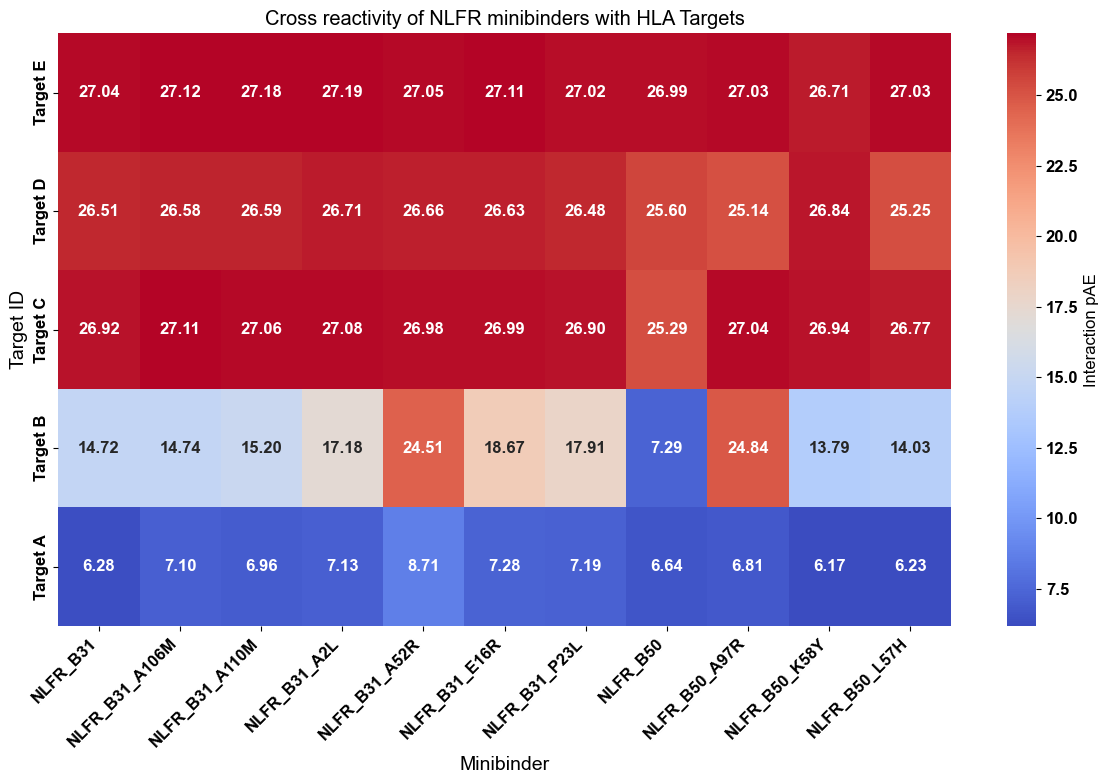

In [183]:


# Load the data
heat_file_path = '../plots/most_perfect/most_perfect_NLFR_binder_31+50.csv'  # Replace with your actual file path
heat_data = pd.read_csv(heat_file_path)

# Extract columns for PAE interactions
pae_columns = [col for col in heat_data.columns if col.startswith('pae_interaction_')]

# Reshape the data for a heatmap
heatmap_data = heat_data.melt(
    id_vars=['name'],
    value_vars=pae_columns,
    var_name='HLA_Target',
    value_name='PAE_Interaction'
)

# Simplify HLA_Target names by removing the 'pae_interaction_' prefix
heatmap_data['HLA_Target'] = heatmap_data['HLA_Target'].str.replace('pae_interaction_', '')

# Provide new names and control the order of targets
target_rename_and_order = {
    'HLA_A_2402_NYFRRVWEF': 'Target E',
    'HLA_A_0201_NLFRRVWEV': 'Target D',
    'HLA_B_0801': 'Target C',
    'HLA_B_0801_NLSRRVWEL': 'Target B',
    'HLA_B_0801_NLFRRVWEL': 'Target A'
    
    
}

# Apply the renaming and enforce the order
heatmap_data['HLA_Target'] = heatmap_data['HLA_Target'].map(target_rename_and_order)
ordered_targets = list(target_rename_and_order.values())
heatmap_data['HLA_Target'] = pd.Categorical(heatmap_data['HLA_Target'], categories=ordered_targets, ordered=True)

# Pivot for heatmap structure
heatmap_pivot = heatmap_data.pivot(index='HLA_Target', columns='name', values='PAE_Interaction')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Interaction pAE'})
plt.title('Cross reactivity of NLFR minibinders with HLA Targets')
plt.xlabel('Minibinder', fontsize=14)
plt.ylabel('Target ID', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/heatmap_NLFR_mibds.png')
plt.show()


## Violin plot for cross reractivity of OG dataset

/var/folders/zj/q39pc9493z50nyp2z1f59dph0000gn/T/ipykernel_55251/3560695055.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HLA_Target', y='PAE_Score', data=violin_data, palette='muted', width=0.4)


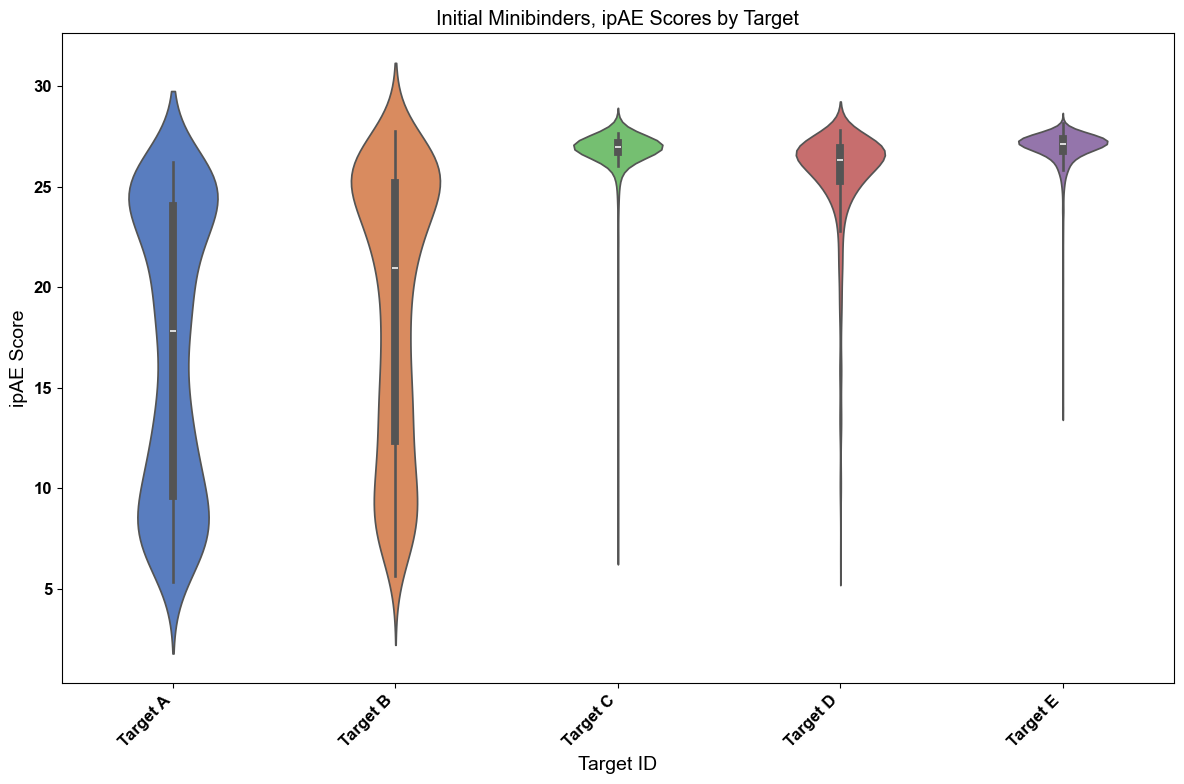

In [185]:
# Load the data
violin_file_path = '../data/master_dataset_NLFR_1000.csv'  # Replace with your actual file path
violin_data = pd.read_csv(violin_file_path)

# Extract columns for PAE interactions
pae_columns = [col for col in violin_data.columns if col.startswith('pae_interaction_')]

# Reshape the data for a violin plot
violin_data = violin_data.melt(
    id_vars=['name'],
    value_vars=pae_columns,
    var_name='HLA_Target',
    value_name='PAE_Score'
)

# Simplify HLA_Target names by removing the 'pae_interaction_' prefix
violin_data['HLA_Target'] = violin_data['HLA_Target'].str.replace('pae_interaction_', '')

# Provide new names and control the order of targets
target_rename_and_order = {
    'HLA_B_0801_NLFRRVWEL': 'Target A',
    'HLA_B_0801_NLSRRVWEL': 'Target B',
    'HLA_B_0801': 'Target C',
    'HLA_A_0201_NLFRRVWEV': 'Target D',
    'HLA_A_2402_NYFRRVWEF': 'Target E'
    
    
}

# Apply the renaming and enforce the order
violin_data['HLA_Target'] = violin_data['HLA_Target'].map(target_rename_and_order)
ordered_targets = list(target_rename_and_order.values())
violin_data['HLA_Target'] = pd.Categorical(violin_data['HLA_Target'], categories=ordered_targets, ordered=True)

# Plot the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='HLA_Target', y='PAE_Score', data=violin_data, palette='muted', width=0.4)
plt.title('Initial Minibinders, ipAE Scores by Target')
plt.xlabel('Target ID', fontsize=14)
plt.ylabel('ipAE Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../figures/init_mibds_violin.png')
plt.show()


## Plot Pareto front evolution

Column names in the CSV file: Index(['name', 'binder_seq', 'pae_interaction_HLA_B_0801_NLFRRVWEL',
       'plddt_binder_HLA_B_0801_NLFRRVWEL',
       'pae_interaction_HLA_B_0801_NLSRRVWEL',
       'plddt_binder_HLA_B_0801_NLSRRVWEL',
       'pae_interaction_HLA_A_2402_NYFRRVWEF',
       'plddt_binder_HLA_A_2402_NYFRRVWEF',
       'pae_interaction_HLA_A_0201_NLFRRVWEV',
       'plddt_binder_HLA_A_0201_NLFRRVWEV', 'pae_interaction_HLA_B_0801',
       'plddt_binder_HLA_B_0801', 'iteration'],
      dtype='object')
        name                                         binder_seq  \
0  binder_20  DELVKKARELARKTAEEARTGTPEKAKELAEELAKAVKEAAAAGLA...   
1  binder_31  DALVAEAERAAEKTAEEVRTGTPEAAEAAARELRDLAVAAAAAGLA...   
2  binder_33  ETPEEREERLRRARELLLEATRAAAEAAAAALAALAWLRAHEAELG...   
3  binder_50  SEEELKKLRERAKIAAENAEKNAKGTEEIAKVVEAAAKRVAADPAT...   
4  binder_60  SELVRAIKEALETAKEALELAKEAAKNAEKLSLEELQELIGRAASL...   

   pae_interaction_HLA_B_0801_NLFRRVWEL  plddt_binder_HLA_B_0801_NLFRRVWEL  \
0  

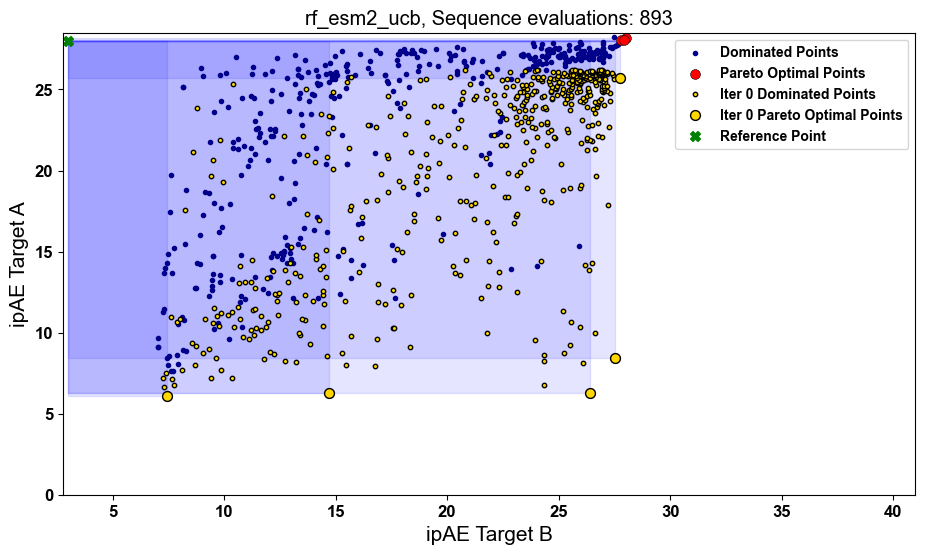

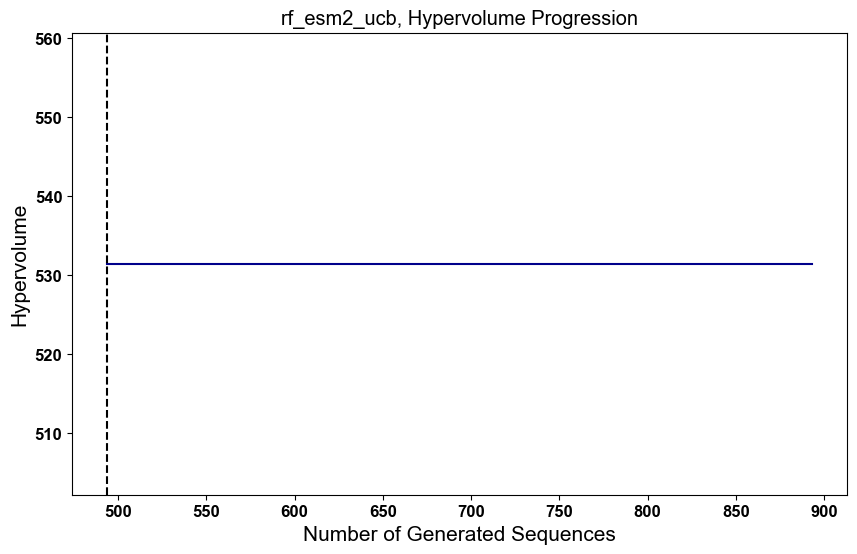

In [235]:
# Hardcoded paths for input CSV and output files
CSV_PATH = '../data/494_NLFR_esm2_rf_ucb_2.csv'
PARETO_CHART_PATH = '../results/pareto_plots/pareto_chart_NLFR_494_esm2_rf_ucb_2.png'
LINE_GRAPH_PATH = '../results/pareto_plots/pareto_line_graph_NLFR_494_esm2_rf_ucb_2.png'

def find_pareto_front(data):
    # Dynamically find the columns that match the target patterns
    target_a_col = [col for col in data.columns if "pae_interaction_HLA_B_0801_NLFRRVWEL" in col][0]
    target_b_col = [col for col in data.columns if "pae_interaction_HLA_B_0801_NLSRRVWEL" in col][0]

    # Print column names for debugging
    print("Objective columns:", target_a_col, target_b_col)

    # Prepare objectives tensor
    objectives = torch.tensor(np.column_stack((-data[target_a_col].values, 
                                               data[target_b_col].values)), dtype=torch.float)

    # Debug: Print objectives
    print("Objective values (after negation for the first objective):")
    print(objectives)

    # Find Pareto optimal points
    pareto_mask = is_non_dominated(objectives)

    # Debug: Print Pareto mask and summary
    print("Pareto mask:", pareto_mask)
    print("Number of Pareto points:", pareto_mask.sum().item())
    print("Number of non-Pareto points:", (~pareto_mask).sum().item())

    return pareto_mask.cpu().numpy()  # Convert back to a NumPy array if needed


def calculate_hypervolume(data):
    # Dynamically find the columns for hypervolume calculation
    target_a_col = [col for col in data.columns if "pae_interaction_HLA_B_0801_NLFRRVWEL" in col][0]
    target_b_col = [col for col in data.columns if "pae_interaction_HLA_B_0801_NLSRRVWEL" in col][0]
    
    data = data[[target_b_col, target_a_col]]
    # Find the Pareto front
    pareto_mask = find_pareto_front(data)
    # Extract the Pareto front points
    pareto_points = torch.tensor(data[pareto_mask].to_numpy(), dtype=torch.float)
    # Invert the second objective as Hypervolume is maximized
    pareto_points[:, 1] = -pareto_points[:, 1]
    
    ref_point = torch.tensor((3.00, -28.00))

    hv = Hypervolume(ref_point=ref_point)
    volume = hv.compute(pareto_points)
    print(f'Hypervolume: {volume}')
    return volume

def accumulate_data_by_iteration(data):
    accumulated_data = []
    for iteration in sorted(data['iteration'].unique()):
        # Accumulate data up to the current iteration
        data_up_to_iteration = data[data['iteration'] <= iteration]
        accumulated_data.append(data_up_to_iteration)
    
    return accumulated_data

def set_plot_font(family='Arial', weight='bold', size=12):
    font = {'family' : 'Arial',
            'weight' : 'bold',
            'size'   : 12
           }
    # Apply font properties
    matplotlib.rc('font', **font)

def plot_pareto_chart(data, save_img_path):

    set_plot_font()

    pareto_mask = find_pareto_front(data)

    pareto_c = 'red' 
    non_pareto_c = 'darkblue'
    fill_c='blue'
    init_iter_c = 'gold'
    
    plt.figure(figsize=(11, 6))

    # Non-pareto points
    non_pareto = data[data['iteration'] != 0]
    plt.scatter(non_pareto['pae_interaction_HLA_B_0801_NLSRRVWEL'], 
                non_pareto['pae_interaction_HLA_B_0801_NLFRRVWEL'], 
                color=non_pareto_c, 
                label='Dominated Points',
                s=9)

    # Extract and plot Pareto front points
    pareto_points = data[pareto_mask]
    plt.scatter(pareto_points['pae_interaction_HLA_B_0801_NLSRRVWEL'], 
                pareto_points['pae_interaction_HLA_B_0801_NLFRRVWEL'], 
                color=pareto_c, 
                edgecolors="black",
                s=50, 
                linewidths=0.4, 
                label='Pareto Optimal Points')
    
    # Iteration 0 points
    pareto_points_0 = data[pareto_mask & (data['iteration'] == 0)]
    non_pareto_0 = data[data['iteration'] == 0]

    # Iteration 0 non-Pareto points
    plt.scatter(non_pareto_0['pae_interaction_HLA_B_0801_NLSRRVWEL'], 
                non_pareto_0['pae_interaction_HLA_B_0801_NLFRRVWEL'], 
                color=init_iter_c, 
                edgecolors="black",
                s=10, 
                label='Iter 0 Dominated Points')

    # Iteration 0 Pareto points
    plt.scatter(pareto_points_0['pae_interaction_HLA_B_0801_NLSRRVWEL'], 
                pareto_points_0['pae_interaction_HLA_B_0801_NLFRRVWEL'], 
                color=init_iter_c, 
                edgecolors="black",
                s=50, 
                label='Iter 0 Pareto Optimal Points')

    # Reference point
    ref_point = (3.00,28.00)
    plt.scatter(ref_point[0], ref_point[1], color='green', label='Reference Point',marker='X', s=50)
    # Shade hypervolume for Pareto front points
    for i in range(len(pareto_points)):
        plt.fill_between([pareto_points.iloc[i]['pae_interaction_HLA_B_0801_NLSRRVWEL'], ref_point[0]],
                         [pareto_points.iloc[i]['pae_interaction_HLA_B_0801_NLFRRVWEL'], pareto_points.iloc[i]['pae_interaction_HLA_B_0801_NLFRRVWEL']],
                         ref_point[1], color=fill_c, alpha=0.1, zorder=0)

    # Axes and labels
    plt.title('rf_esm2_ucb, Sequence evaluations: {}'.format(len(data)))
    plt.xlabel('ipAE Target B', fontsize=15)
    plt.ylabel('ipAE Target A', fontsize=15)

    plt.xlim(ref_point[0]-0.25, max(data['pae_interaction_HLA_B_0801_NLSRRVWEL'])+13)
    plt.ylim(0, ref_point[1]+0.5)

    # Add legend to the right of the plot, inside the plot area
    plt.legend(loc='upper right', fontsize=10)

    # Show the plot
    plt.savefig(save_img_path)

def plot_line_graph(data, save_img_path):
    set_plot_font()
    accumulated_data = accumulate_data_by_iteration(data)
    
    hypervolumes = []
    for data_up_to_iteration in accumulated_data:
        # Calculate hypervolume for each accumulated data set
        hv = calculate_hypervolume(data_up_to_iteration)
        hypervolumes.append(hv)
    
    # List of the number of sequences up to each iteration
    queried_sequences = [data.shape[0] for data in accumulated_data]
    plt.figure(figsize=(10, 6))
    plt.step(queried_sequences, hypervolumes, where="post", color = 'darkblue')
    plt.axvline(x=queried_sequences[0], color='black', linestyle='--', label='Iteration 0')
    plt.title('rf_esm2_ucb, Hypervolume Progression')
    plt.xlabel('Number of Generated Sequences', size=15)
    plt.ylabel('Hypervolume', size=15)
    plt.savefig(save_img_path)

    
def main():
    # Load the data from the specified CSV path
    data = pd.read_csv(CSV_PATH, delimiter=',')
    print("Column names in the CSV file:", data.columns)  # Debugging step to check columns
    print(data.head())  # Inspect the first few rows to verify proper parsing

    # Optional: Add a default 'iteration' column if missing
    if 'iteration' not in data.columns:
        data['iteration'] = 0
    
    # Generate and save plots
    plot_pareto_chart(data, PARETO_CHART_PATH)
    plot_line_graph(data, LINE_GRAPH_PATH)

if __name__ == "__main__":
    main()


## Distribution of initial dataset across all targets

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths for datasets
file_paths = [
    '../plots/correlation_data/initial_datasets/diverse_dataset_NLFR_25.csv',
    '../plots/correlation_data/initial_datasets/diverse_dataset_NLFR_100.csv',
    '../plots/correlation_data/initial_datasets/master_dataset_NLFR_494.csv',
    '../plots/correlation_data/initial_datasets/494_NLFR_blosum62_rf_ucb_2.csv',
    '../plots/correlation_data/initial_datasets/master_dataset_NLFR_1000.csv',
]

# Custom x-axis labels for the datasets
custom_labels = [
    "Dataset 25",
    "Dataset 100",
    "Dataset 500",
    "Dataset 700",
    "Dataset 1000"
]

# Define the columns (true values) and their corresponding targets
columns_and_targets = [
    ('Target A', 'pae_interaction_HLA_B_0801_NLFRRVWEL'),
    ('Target B', 'pae_interaction_HLA_B_0801_NLSRRVWEL'),
    ('Target C', 'pae_interaction_HLA_B_0801'),
    ('Target D', 'pae_interaction_HLA_A_0201_NLFRRVWEV'),
    ('Target E', 'pae_interaction_HLA_A_2402_NYFRRVWEF'),
]

# Combine data from all files into a single DataFrame
all_data = []

for file_path, label in zip(file_paths, custom_labels):
    # Load the dataset
    data = pd.read_csv(file_path)

    for target_name, column in columns_and_targets:
        if column in data.columns:
            # Append the data for this column and target
            all_data.append(
                pd.DataFrame({
                    'Value': data[column],
                    'Target': target_name,
                    'Dataset': label  # Use custom label for the dataset
                })
            )
        else:
            print(f"Column '{column}' not found in {file_path}")

# Concatenate all data into a single DataFrame
all_data = pd.concat(all_data, axis=0)

# Define a prettier color palette
palette = sns.color_palette("muted", n_colors=5)  # "muted" generates softer colors
target_palette = dict(zip([t[0] for t in columns_and_targets], palette))

# Plot the distribution of true values for all datasets and targets
plt.figure(figsize=(20, 10))
sns.boxplot(
    x='Dataset', y='Value', hue='Target', data=all_data, palette=target_palette
)

# Customize the plot
plt.title("Distribution of ipAE scores Across Datasets and Targets", fontsize=16)
plt.xlabel("Dataset", fontsize=14, fontweight='bold')
plt.ylabel("ipAE score", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust the legend (move to lower right corner)
plt.legend(title="Target", fontsize=12, title_fontsize=14, loc='lower right')

# Adjust layout and display
plt.tight_layout()
plt.show()


## Correlation plot

### Pearson correlation between true and predicted values
Calculates and plots correlation for each target

Target A - Pearson correlation value: 0.9086904155934539
Target B - Pearson correlation value: 0.6655424212018201
Target C - Pearson correlation value: -0.08884029855778328
Target D - Pearson correlation value: -0.12448076384739278
Target E - Pearson correlation value: -0.446131243071775


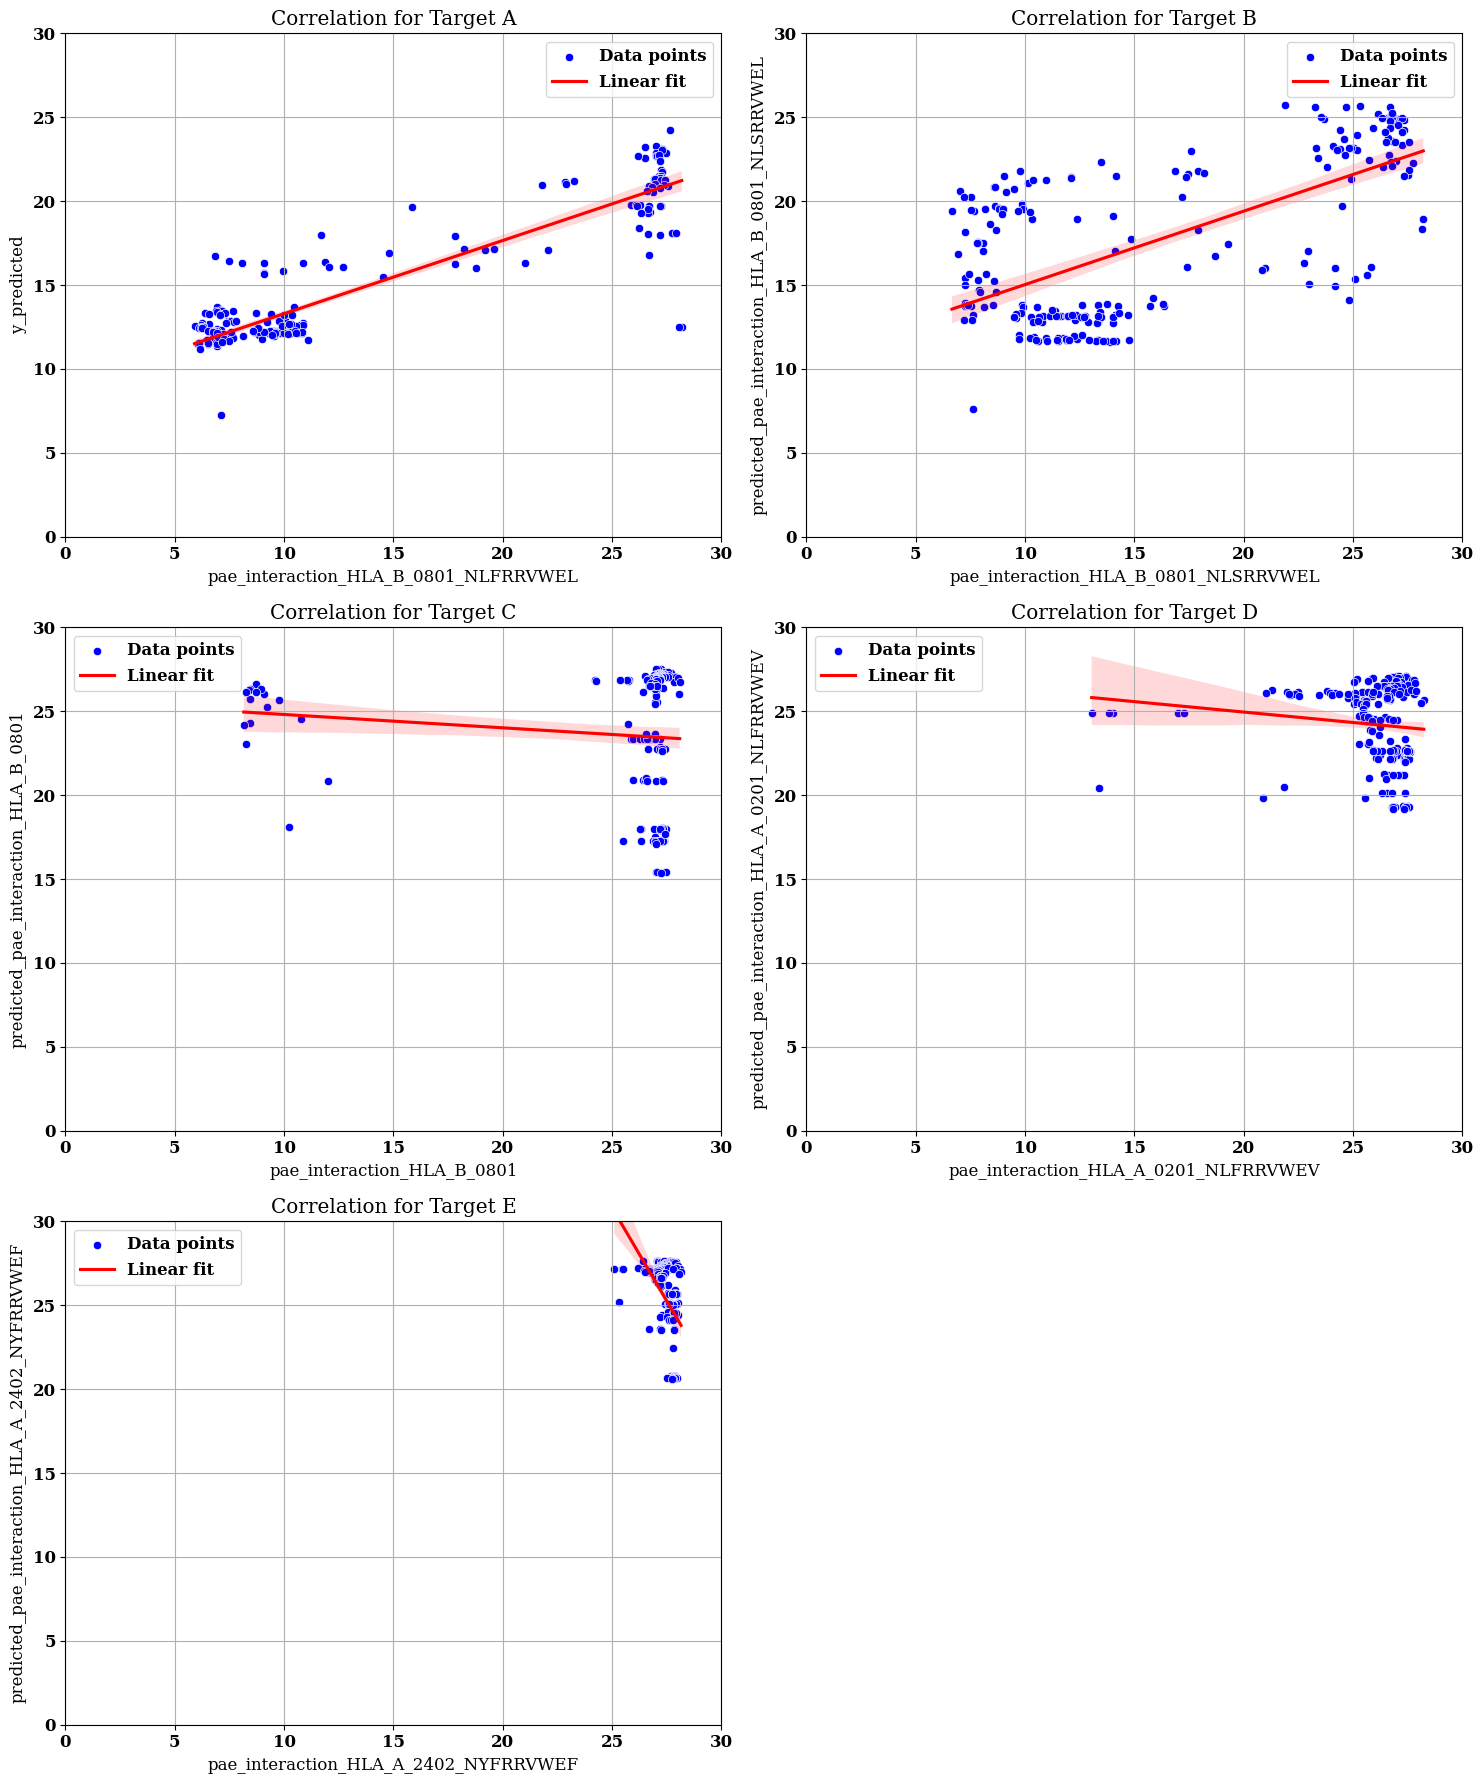

In [ ]:
# Define file paths and corresponding x, y columns for each target
file_paths = [
    ("/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/predicted_494_NLFR_blosum62_rf_ucb.csv",
     "/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/true_494_NLFR_blosum62_rf_ucb.csv",
     "Target A",
     "pae_interaction_HLA_B_0801_NLFRRVWEL",  # X-column
     "y_predicted"),                          # Y-column
    ("/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/predicted_494_NLFR_blosum62_rf_ucb.csv",
     "/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/true_494_NLFR_blosum62_rf_ucb.csv",
     "Target B",
     "pae_interaction_HLA_B_0801_NLSRRVWEL",   # X-column
     "predicted_pae_interaction_HLA_B_0801_NLSRRVWEL"),                    # Y-column
    ("/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/predicted_494_NLFR_blosum62_rf_ucb.csv",
     "/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/true_494_NLFR_blosum62_rf_ucb.csv",
     "Target C",
     "pae_interaction_HLA_B_0801",     # X-column
     "predicted_pae_interaction_HLA_B_0801"),                 # Y-column
    ("/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/predicted_494_NLFR_blosum62_rf_ucb.csv",
     "/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/true_494_NLFR_blosum62_rf_ucb.csv",
     "Target D",
     "pae_interaction_HLA_A_0201_NLFRRVWEV",                # X-column
     "predicted_pae_interaction_HLA_A_0201_NLFRRVWEV"),                 # Y-column
    ("/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/predicted_494_NLFR_blosum62_rf_ucb.csv",
     "/Users/alberteenglund/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/DBL001_CD_s215067_s215063/plots/correlation_data/blosum62_rf_ucb/true_494_NLFR_blosum62_rf_ucb.csv",
     "Target E",
     "pae_interaction_HLA_A_2402_NYFRRVWEF",                # X-column
     "predicted_pae_interaction_HLA_A_2402_NYFRRVWEF")                  # Y-column
]

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))  # Adjust rows and columns as needed
axes = axes.flatten()  # Flatten axes for easy iteration

for i, (predicted_path, true_path, target_name, x_col, y_col) in enumerate(file_paths):
    # Read datasets
    predicted_data = pd.read_csv(predicted_path)
    true_data = pd.read_csv(true_path)
    
    # Match sequences from both datasets
    matched_data = pd.merge(predicted_data, true_data, left_on='sequence', right_on='binder_seq')
    
    # Filter data for the current iteration (e.g., iteration 3)
    iter_data = matched_data[matched_data['iteration_y'] == 1]
    
    # Find the maximum values for the x and y limits
    x_max = iter_data[x_col].max(skipna=True)
    y_max = iter_data[y_col].max(skipna=True)
    
    # Plot on the current axis
    sns.scatterplot(
        data=iter_data,
        x=x_col,
        y=y_col,
        color='blue',
        label='Data points',
        ax=axes[i]
    )
    sns.regplot(
        data=iter_data,
        x=x_col,
        y=y_col,
        scatter=False,
        color='red',
        label='Linear fit',
        ax=axes[i]
    )
    axes[i].set_title(f"Correlation for {target_name}")
    axes[i].set_xlabel(f"{x_col}")
    axes[i].set_ylabel(f"{y_col}")
    axes[i].set_xlim(0, 30)
    axes[i].set_ylim(0, 30)
    axes[i].legend()
    axes[i].grid(True)
    
    # Calculate and display Pearson correlation
    correlation, _ = pearsonr(iter_data[x_col], iter_data[y_col])
    print(f"{target_name} - Pearson correlation value: {correlation}")

# Hide any unused subplots
for j in range(len(file_paths), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Plot of all Pearson correlations across all model and dataset sizes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for each model with NRMSE values
models_data = {
    "rf_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.00417, -0.731, 0.652, -0.367, -0.340],
        "Target B": [0.220, 0.00824, -0.466, -0.288, 0.0266],
        "Target C": [0.999, 0.969, 0.664, -0.0791, 0.702],
        "Target D": [0.299, 0.272, 0.694, -0.0639, 0.552],
        "Target E": [0.204, 0.532, 0.968, 0.912, 0.724]
    },
    "ridge_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.709, -0.746, 0.0841, -0.106, -0.0731],
        "Target B": [0.400, -0.183, -0.461, -0.283, -0.244],
        "Target C": [0.998, 0.975, 0.329, -0.0420, -0.0477],
        "Target D": [-0.379, 0.868, 0.367, -0.189, -0.259],
        "Target E": [-0.0675, 0.781, 0.824, -0.0195, 0.229]
    },
    "rf_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.0649, -0.263, 0.0535, 0.254, -0.0262],
        "Target B": [0.136, -0.113, 0.181, 0.115, -0.0370],
        "Target C": [0.986, 0.886, 0.975, 0.2334, 0.909],
        "Target D": [-0.000890, 0.369, 0.683, 0.0839, 0.579],
        "Target E": [0.413, 0.0498, 0.791, 0.439, 0.822]
    },
    "ridge_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.121, 0.211, -0.103, -0.133,-0.451],
        "Target B": [0.465, 0.0678, -0.0555, 0.0576, -0.196],
        "Target C": [0.112, 0.514, 0.571, 0.555, 0.646],
        "Target D": [0.360, -0.0224, 0.111, 0.288, 0.647],
        "Target E": [0.178, 0.333, 0.314, 0.808, 0.0234]
    }
}

# Plotting Pearson correlations for each model in a single row of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
titles = list(models_data.keys())
targets = ["Target A", "Target B", "Target C", "Target D", "Target E"]
palette = sns.color_palette("muted", n_colors=5)  # Using a custom color palette
# Converting sample sizes to a uniformly spaced scale
uniform_x = [0, 1, 2, 3, 4]  # Equal spacing for the 5 points
labels = [25, 100, 500, 700, 1000]

for i, (title, data) in enumerate(models_data.items()):
    df = pd.DataFrame(data)
    for j, target in enumerate(targets):
        axs[i].plot(uniform_x, df[target], marker='o', label=target, color=palette[j])
    axs[i].set_title(title, fontsize=12, fontname='Arial')
    axs[i].grid(True, linestyle='--', alpha=0.7)
    if i == len(models_data) - 1:  # Add legend only for the last plot
        axs[i].legend(title="Targets", fontsize=9.3, loc="lower right", prop={'family': 'Arial'})
    axs[i].set_xticks(uniform_x)
    axs[i].set_xticklabels(labels)
    axs[i].set_xlabel("Sample Size", fontsize=10, fontname='Arial')
    if i == 0:  # Add ylabel to the first plot
        axs[i].set_ylabel("Pearson Correlation of uncertainties", fontsize=10, fontname='Arial')

plt.tight_layout()
plt.show()

### Calculation of NRMSE

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize results dictionary for NRMSE
results = {}

# Iterate over targets for NRMSE calculation
for target_name, true_col, pred_col in targets:
    # Filter data for the current iteration
    iter_data = matched_data[matched_data['iteration_y'] == 2]

    # Convert to numeric and handle NaN values
    y_true = pd.to_numeric(iter_data[true_col], errors='coerce')
    y_pred = pd.to_numeric(iter_data[pred_col], errors='coerce')

    valid_indices = ~y_true.isna() & ~y_pred.isna()  # Ensure valid data points
    y_true = y_true[valid_indices]
    y_pred = y_pred[valid_indices]

    if len(y_true) > 0 and len(y_pred) > 0:  # Ensure there is data to process
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        # Normalize RMSE by the range of the true values
        nrmse = rmse / (y_true.max() - y_true.min())

        # Store the NRMSE result
        results[target_name] = nrmse
        print(rmse)
    else:
        print(f"Insufficient valid data for {target_name}")

# Print results for all targets
print("\nNormalized Root Mean Square Error (NRMSE) for all targets:")
for target, nrmse in results.items():
    print(f"  {target}: {nrmse:.4f}")


### Plot of NRMSE across all models and dataset sizes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for each model with NRMSE values
models_data_nrmse = {
    "rf_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.7532, 0.6501, 0.2238, 0.7535, 0.5523],
        "Target B": [0.4276, 0.2253, 0.2616, 0.6055, 0.2694],
        "Target C": [4.1534, 0.4201, 0.3425, 0.4817, 0.2602],
        "Target D": [0.5047, 0.3456, 0.2594, 0.4924, 0.2930],
        "Target E": [0.1836, 0.1678, 1.066, 1.2929, 0.1806]
    },
    "ridge_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.4948, 0.8056, 0.2313, 0.5258, 0.6946],
        "Target B": [0.3884, 0.2589, 0.3570, 0.5667, 0.4445],
        "Target C": [12.4903, 0.8357, 0.3123, 0.5686, 0.1627],
        "Target D": [0.2993, 0.5859, 0.3121, 0.3084, 0.2752],
        "Target E": [0.1996, 0.5633, 0.3102, 0.1674, 0.4088]
    },
    "rf_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.7424, 0.5551, 0.5315, 0.3750, 0.5055],
        "Target B": [0.4347, 0.2391, 0.3323, 0.2917, 0.2531],
        "Target C": [1.8218, 0.2933, 0.5535, 0.1955, 1.1270],
        "Target D": [0.3615, 0.3222, 0.3510, 0.2164, 0.2985],
        "Target E": [0.3736, 0.1783, 0.2421, 0.1718, 0.6165]
    },
    "ridge_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.7999, 0.6903, 0.4503, 0.4107, 0.6143],
        "Target B": [0.4265, 0.2007, 0.3547, 0.2860, 0.3013],
        "Target C": [0.2478, 0.3286, 0.2109, 0.1539, 0.1366],
        "Target D": [0.2588, 0.4005, 0.2101, 0.2211, 0.2409],
        "Target E": [0.4904, 0.3466, 0.1850, 0.3004, 0.1031]
    }
}

# Plotting NRMSE for each model in a single row of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
titles = list(models_data_nrmse.keys())
targets = ["Target A", "Target B", "Target C", "Target D", "Target E"]
palette = sns.color_palette("muted", n_colors=5)  # Using a custom color palette
uniform_x = [0, 1, 2, 3, 4]  # Equal spacing for the 5 points
labels = [25, 100, 500, 700, 1000]

for i, (title, data) in enumerate(models_data_nrmse.items()):
    df = pd.DataFrame(data)
    for j, target in enumerate(targets):
        axs[i].plot(uniform_x, df[target], marker='o', label=target, color=palette[j])
    axs[i].set_title(title, fontsize=14, fontname='Arial')
    axs[i].grid(True, linestyle='--', alpha=0.7)
    if i == len(models_data_nrmse) - 1:  # Add legend only for the last plot
        axs[i].legend(title="Targets", fontsize=9.3, loc="upper right", prop = {'family': 'Arial'})
    axs[i].set_xticks(uniform_x)
    axs[i].set_xticklabels(labels)
    axs[i].set_xlabel("Sample Size", fontsize=10, fontname='Arial')
    axs[i].set_ylim(0, 2) 
    if i == 0:  # Add ylabel to the first plot
        axs[i].set_ylabel("NRMSE", fontsize=10, fontname='Arial')

plt.tight_layout()
plt.show()


### Pearson correlation of uncertainties

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# File paths
predicted_file_path = '../plots/correlation_data/494_samples/blosum62_ridge_ucb/predicted_494_NLFR_blosum62_ridge_ucb.csv'
true_file_path = '../plots/correlation_data/494_samples/blosum62_ridge_ucb/true_494_NLFR_blosum62_ridge_ucb.csv'

# Define targets and corresponding columns
targets = [
    ('Target A', 'pae_interaction_HLA_B_0801_NLFRRVWEL', 'y_predicted', 'y_sigma'),
    ('Target B', 'pae_interaction_HLA_B_0801_NLSRRVWEL', 'predicted_pae_interaction_HLA_B_0801_NLSRRVWEL', 'uncertainty_pae_interaction_HLA_B_0801_NLSRRVWEL'),
    ('Target C', 'pae_interaction_HLA_B_0801', 'predicted_pae_interaction_HLA_B_0801', 'uncertainty_pae_interaction_HLA_B_0801'),
    ('Target D', 'pae_interaction_HLA_A_0201_NLFRRVWEV','predicted_pae_interaction_HLA_A_0201_NLFRRVWEV', 'uncertainty_pae_interaction_HLA_A_0201_NLFRRVWEV'),
    ('Target E', 'pae_interaction_HLA_A_2402_NYFRRVWEF', 'predicted_pae_interaction_HLA_A_2402_NYFRRVWEF', 'uncertainty_pae_interaction_HLA_A_2402_NYFRRVWEF')
]

# Load the data
predicted_data = pd.read_csv(predicted_file_path)
true_data = pd.read_csv(true_file_path)

# Match sequences from both datasets
matched_data = pd.merge(predicted_data, true_data, left_on='sequence', right_on='binder_seq')

# List to store correlations
uncertainty_correlations = []

# Iterate over each iteration and target
iterations = matched_data['iteration_y'].unique()
average_correlations_per_iteration = []

for iteration in iterations:
    iter_data = matched_data[matched_data['iteration_y'] == iteration]
    iteration_correlations = []
    
    for target, true_col, pred_col, pred_uncertainty_col in targets:
        true_values = iter_data[true_col]
        predicted_uncertainty = iter_data[pred_uncertainty_col]
        true_uncertainty = abs(iter_data[pred_col] - true_values)
        
        # Calculate correlation between predicted and true uncertainty
        correlation, _ = pearsonr(true_uncertainty, predicted_uncertainty)
        iteration_correlations.append(correlation)
        
        uncertainty_correlations.append({
            'Iteration': iteration,
            'Target': target,
            'Correlation': correlation
        })
    
    # Calculate the average correlation for this iteration across all targets
    avg_correlation = sum(iteration_correlations) / len(iteration_correlations)
    average_correlations_per_iteration.append({'Iteration': iteration, 'Average Correlation': avg_correlation})

# Convert results to DataFrame
results_df = pd.DataFrame(uncertainty_correlations)

# Convert average correlations per iteration to DataFrame
average_iteration_df = pd.DataFrame(average_correlations_per_iteration)

# Display results
print("Uncertainty Correlations by Target and Iteration")
print(results_df)

print("\nAverage Correlation Across All Targets for Each Iteration")
print(average_iteration_df)


### Plot of uncertainty correlations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for each model with NRMSE values
models_data = {
    "rf_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.00417, -0.731, 0.652, -0.367, -0.340],
        "Target B": [0.220, 0.00824, -0.466, -0.288, 0.0266],
        "Target C": [0.999, 0.969, 0.664, -0.0791, 0.702],
        "Target D": [0.299, 0.272, 0.694, -0.0639, 0.552],
        "Target E": [0.204, 0.532, 0.968, 0.912, 0.724]
    },
    "ridge_blosum62_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.709, -0.746, 0.0841, -0.106, -0.0731],
        "Target B": [0.400, -0.183, -0.461, -0.283, -0.244],
        "Target C": [0.998, 0.975, 0.329, -0.0420, -0.0477],
        "Target D": [-0.379, 0.868, 0.367, -0.189, -0.259],
        "Target E": [-0.0675, 0.781, 0.824, -0.0195, 0.229]
    },
    "rf_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [-0.0649, -0.263, 0.0535, 0.254, -0.0262],
        "Target B": [0.136, -0.113, 0.181, 0.115, -0.0370],
        "Target C": [0.986, 0.886, 0.975, 0.2334, 0.909],
        "Target D": [-0.000890, 0.369, 0.683, 0.0839, 0.579],
        "Target E": [0.413, 0.0498, 0.791, 0.439, 0.822]
    },
    "ridge_esm2_ucb": {
        "Sample Size": [25, 100, 500, 700, 1000],
        "Target A": [0.121, 0.211, -0.103, -0.133,-0.451],
        "Target B": [0.465, 0.0678, -0.0555, 0.0576, -0.196],
        "Target C": [0.112, 0.514, 0.571, 0.555, 0.646],
        "Target D": [0.360, -0.0224, 0.111, 0.288, 0.647],
        "Target E": [0.178, 0.333, 0.314, 0.808, 0.0234]
    }
}

# Plotting Pearson correlations for each model in a single row of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
titles = list(models_data.keys())
targets = ["Target A", "Target B", "Target C", "Target D", "Target E"]
palette = sns.color_palette("muted", n_colors=5)  # Using a custom color palette
# Converting sample sizes to a uniformly spaced scale
uniform_x = [0, 1, 2, 3, 4]  # Equal spacing for the 5 points
labels = [25, 100, 500, 700, 1000]

for i, (title, data) in enumerate(models_data.items()):
    df = pd.DataFrame(data)
    for j, target in enumerate(targets):
        axs[i].plot(uniform_x, df[target], marker='o', label=target, color=palette[j])
    axs[i].set_title(title, fontsize=12, fontname='Arial')
    axs[i].grid(True, linestyle='--', alpha=0.7)
    if i == len(models_data) - 1:  # Add legend only for the last plot
        axs[i].legend(title="Targets", fontsize=9.3, loc="lower right", prop={'family': 'Arial'})
    axs[i].set_xticks(uniform_x)
    axs[i].set_xticklabels(labels)
    axs[i].set_xlabel("Sample Size", fontsize=10, fontname='Arial')
    if i == 0:  # Add ylabel to the first plot
        axs[i].set_ylabel("Pearson Correlation of uncertainties", fontsize=10, fontname='Arial')

plt.tight_layout()
plt.show()

### Distribution of uncertainties

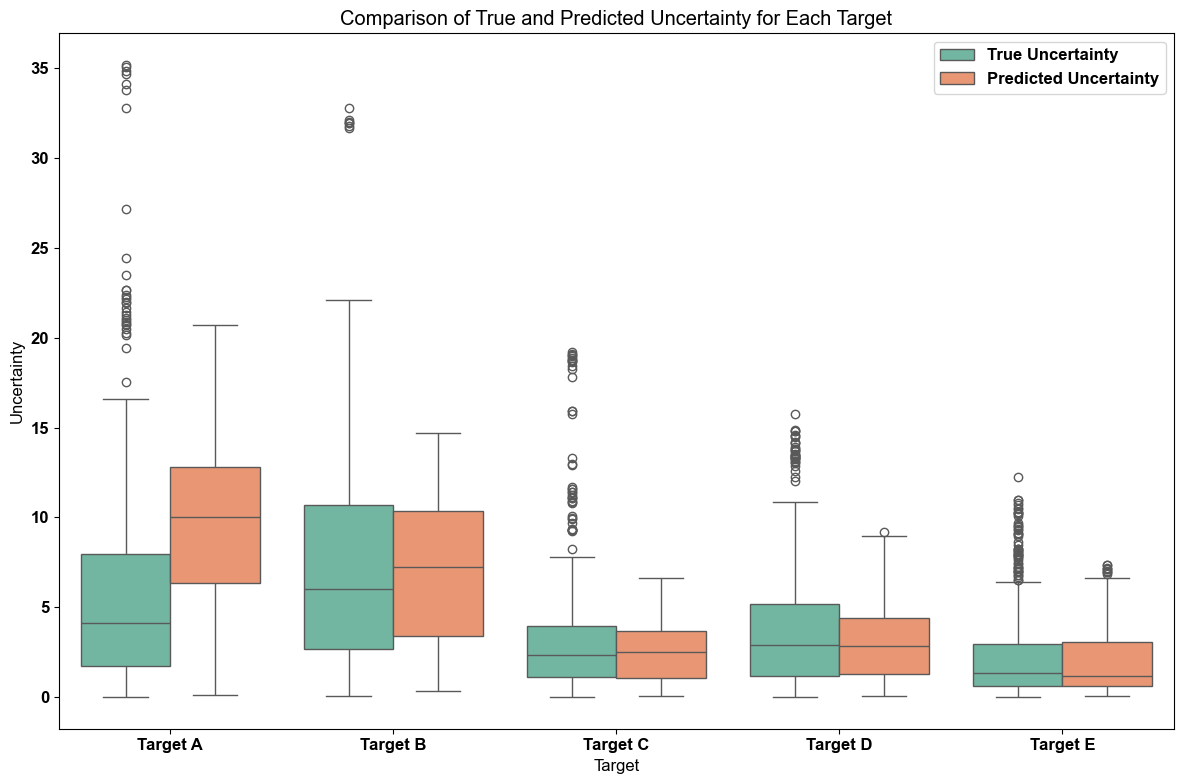

In [221]:
# Define file paths
predicted_file_path = '../plots/correlation_data/blosum62_ridge_ucb/predicted_494_NLFR_blosum62_ridge_ucb.csv'
true_file_path = '../plots/correlation_data/blosum62_ridge_ucb/true_494_NLFR_blosum62_ridge_ucb.csv'

# Load the data
predicted_data = pd.read_csv(predicted_file_path)
true_data = pd.read_csv(true_file_path)

# Match sequences from both datasets
matched_data = pd.merge(predicted_data, true_data, left_on='sequence', right_on='binder_seq')

# Define targets and corresponding columns
targets = [
    ('Target A', 'pae_interaction_HLA_B_0801_NLFRRVWEL', 'y_predicted', 'y_sigma'),
    ('Target B', 'pae_interaction_HLA_B_0801_NLSRRVWEL', 'predicted_pae_interaction_HLA_B_0801_NLSRRVWEL', 'uncertainty_pae_interaction_HLA_B_0801_NLSRRVWEL'),
    ('Target C', 'pae_interaction_HLA_B_0801', 'predicted_pae_interaction_HLA_B_0801', 'uncertainty_pae_interaction_HLA_B_0801'),
    ('Target D', 'pae_interaction_HLA_A_0201_NLFRRVWEV','predicted_pae_interaction_HLA_A_0201_NLFRRVWEV', 'uncertainty_pae_interaction_HLA_A_0201_NLFRRVWEV'),
    ('Target E', 'pae_interaction_HLA_A_2402_NYFRRVWEF', 'predicted_pae_interaction_HLA_A_2402_NYFRRVWEF', 'uncertainty_pae_interaction_HLA_A_2402_NYFRRVWEF')
]

# Prepare data for plotting
plot_data = []

for target, true_col, pred_col, pred_uncertainty_col in targets:
    true_values = matched_data[true_col]
    predicted_values = matched_data[pred_col]
    predicted_uncertainty = matched_data[pred_uncertainty_col]
    
    true_uncertainty = abs(predicted_values - true_values)
    
    for value in true_uncertainty:
        plot_data.append({'Target': target, 'Uncertainty Type': 'True Uncertainty', 'Value': value})
    
    for value in predicted_uncertainty:
        plot_data.append({'Target': target, 'Uncertainty Type': 'Predicted Uncertainty', 'Value': value})

plot_df = pd.DataFrame(plot_data)

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Target', y='Value', hue='Uncertainty Type', data=plot_df, palette='Set2')
plt.title('Comparison of True and Predicted Uncertainty for Each Target')
plt.xlabel('Target')
plt.ylabel('Uncertainty')
plt.legend()
plt.tight_layout()
plt.show()

## pLDDT barplot

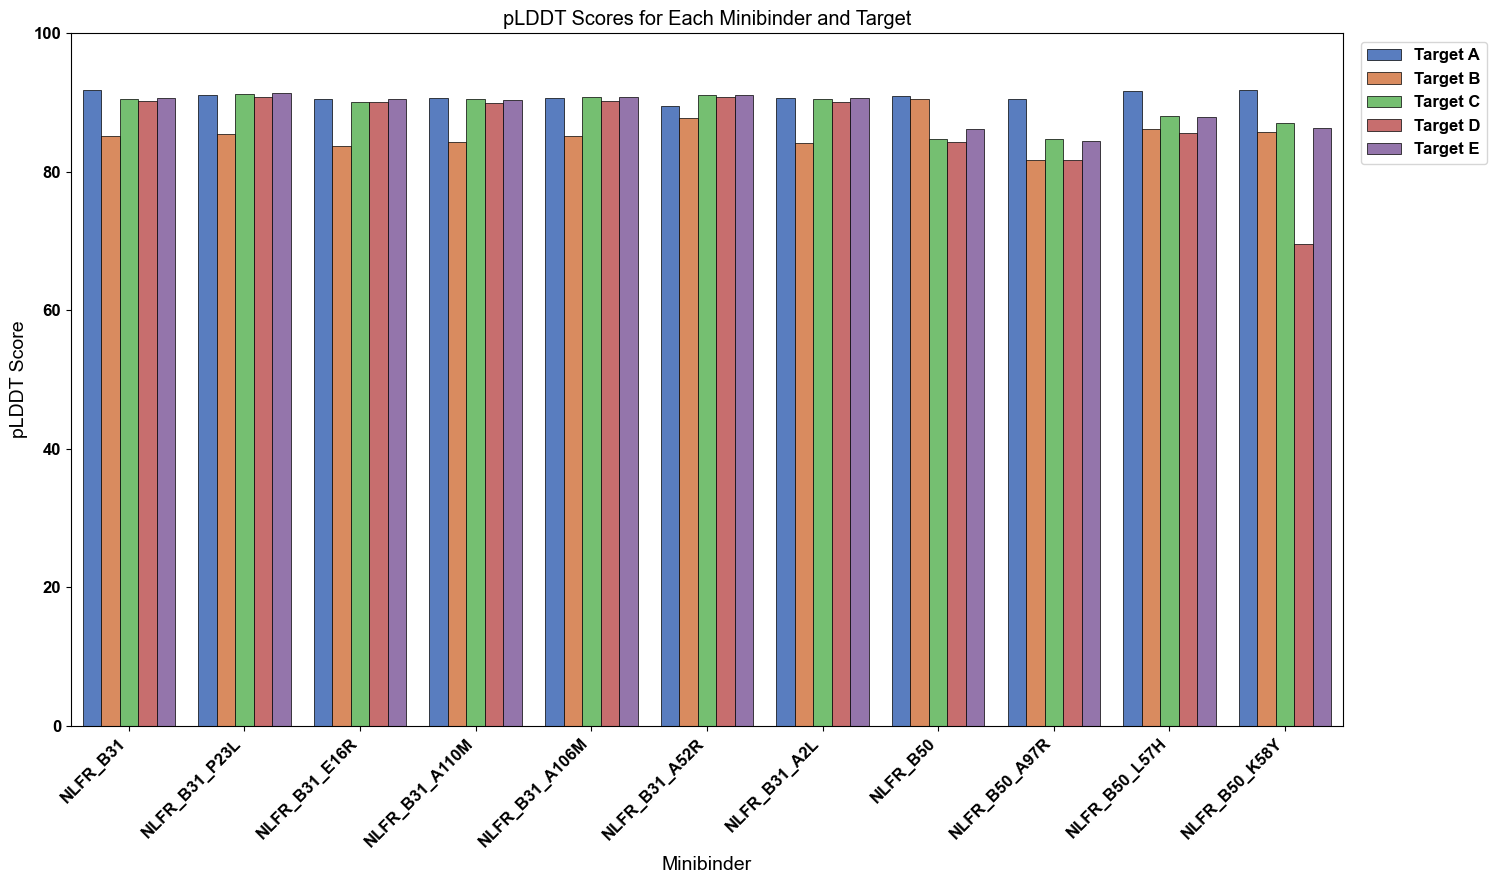

In [236]:
# Load the data
plddt_file_path = '../plots/most_perfect/most_perfect_NLFR_binder_31+50.csv'

try:
    plddt_data = pd.read_csv(plddt_file_path)
    if plddt_data.empty:
        raise ValueError("The CSV file is empty.")
except pd.errors.EmptyDataError:
    raise ValueError("No columns to parse from file. The CSV file might be empty or not formatted correctly.")

# Extract columns for plddt scores
plddt_columns = [col for col in plddt_data.columns if col.startswith('plddt_binder_')]

# Reshape the data for a bar plot
plddt_data_melted = plddt_data.melt(
    id_vars=['name'],
    value_vars=plddt_columns,
    var_name='Target',
    value_name='plddt_score'
)

# Simplify Target names by removing the 'plddt_binder_' prefix
plddt_data_melted['Target'] = plddt_data_melted['Target'].str.replace('plddt_binder_', '')

target_rename_and_order = {
    'HLA_B_0801_NLFRRVWEL': 'Target A',
    'HLA_B_0801_NLSRRVWEL': 'Target B',
    'HLA_B_0801': 'Target C',
    'HLA_A_0201_NLFRRVWEV': 'Target D',
    'HLA_A_2402_NYFRRVWEF': 'Target E'
    
    
}

# Apply the renaming and enforce the order
plddt_data_melted['Target'] = plddt_data_melted['Target'].map(target_rename_and_order)
ordered_targets = list(target_rename_and_order.values())
plddt_data_melted['Target'] = pd.Categorical(plddt_data_melted['Target'], categories=ordered_targets, ordered=True)

# Plot the bar plot
plt.figure(figsize=(15, 9))
plt.ylim(0, 100)
sns.barplot(x='name', y='plddt_score', hue='Target', data=plddt_data_melted, palette='muted', edgecolor='black', linewidth=0.5)
plt.title('pLDDT Scores for Each Minibinder and Target')
plt.xlabel('Minibinder', fontsize=14)
plt.ylabel('pLDDT Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.12, 1), loc='upper right')
plt.tight_layout()
plt.savefig('../figures/plddt_barplot.png')
plt.show()